In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import warnings
from google.colab import drive
from mpl_toolkits import mplot3d
from pylab import rcParams
from scipy import stats
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV

In [0]:
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.expand_frame_repr', False)
rcParams['figure.figsize'] = 14, 7

In [10]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = "/content/drive/My Drive/training_data.csv"

In [0]:
df = pd.read_csv(path)

In [14]:
df.head()

,X1,X2,y
0,458.7,458.7,1187.0
1,488.5,488.5,1149.1
2,588.3,588.3,1268.3
3,613.3,613.3,1124.9
4,606.7,606.7,1194.5


In [15]:
print ("Total number of rows in dataset = {}".format(df.shape[0]))
print ("Total number of columns in dataset = {}".format(df.shape[1]))

Total number of rows in dataset = 155
Total number of columns in dataset = 3


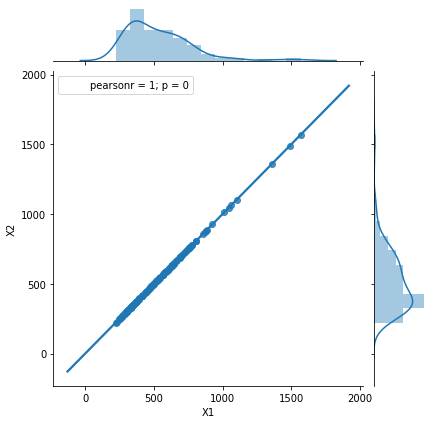

In [16]:
j = sns.jointplot("X1", "X2", data = df, kind = 'reg')
j.annotate(stats.pearsonr)
plt.show()

In [0]:
target_col = "y"
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

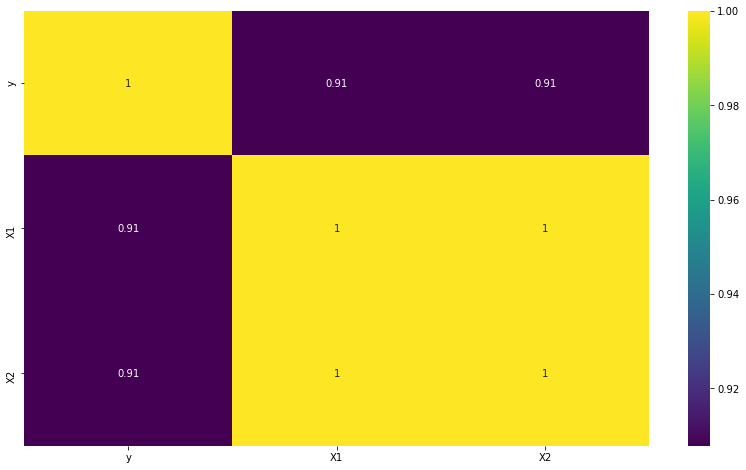

In [18]:
k = 3 #number of variables for heatmap
cols = df.corr().nlargest(k, target_col)[target_col].index
cm = df[cols].corr()
plt.figure(figsize=(14,8))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [0]:
X_with_constant = sm.add_constant(X)
model = sm.OLS(y, X_with_constant)

In [20]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     717.3
Date:                Sat, 07 Dec 2019   Prob (F-statistic):           1.24e-59
Time:                        07:11:33   Log-Likelihood:                -1026.0
No. Observations:                 155   AIC:                             2056.
Df Residuals:                     153   BIC:                             2062.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.2964     36.565      0.747      0.4

In [0]:
lasso = Lasso()
params = {"alpha" : [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 1e1, 
                     1e2, 1e3, 1e4, 1e5, 1e6, 1e7]}

In [0]:
lasso_regressor = GridSearchCV(lasso, params, 
                               scoring="neg_mean_squared_error", 
                               cv=5)

In [31]:
lasso_regressor.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   10.0, 100.0, 1000.0, 10000.0, 100000.0,
                                   1000000.0, 10000000.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [32]:
lasso_regressor.best_score_

-61484.23850071816

In [33]:
lasso_regressor.best_estimator_

Lasso(alpha=10000.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
lasso_best = lasso_regressor.best_estimator_

In [35]:
lasso_best.fit(X, y)

Lasso(alpha=10000.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

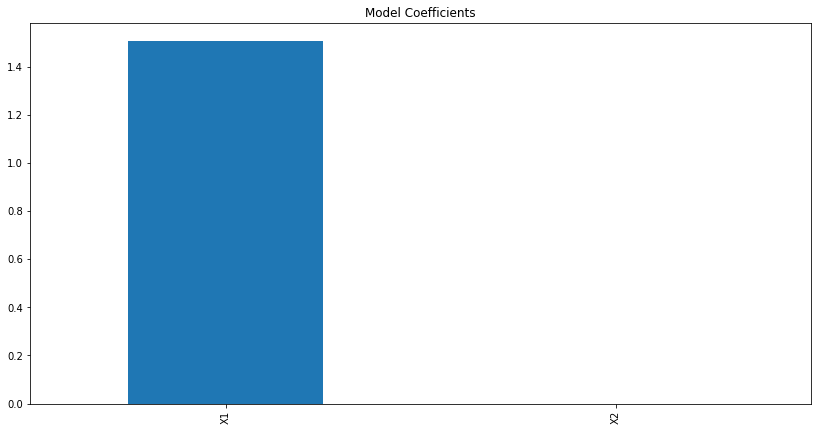

In [36]:
coef = pd.Series(lasso_best.coef_,list(X.columns))
coef.plot(kind='bar', title='Model Coefficients')